In [4]:
from matplotlib import pyplot
from numpy import float32, random, array, prod, arange, clip, ndarray
from tensorflow.keras import layers, Model, backend
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [5]:
data = cifar10.load_data()
(x_train, _), (x_test, _) = data
x_train = array(x_train)
x_test = array(x_test)

In [6]:
x_train.shape

(50000, 32, 32, 3)

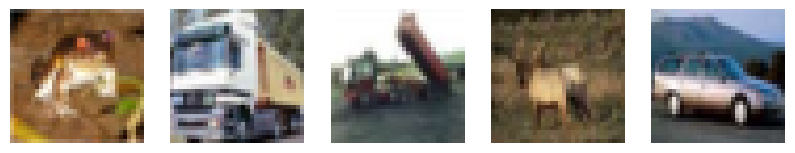

In [7]:
i = 1
pyplot.figure(figsize=(10, 10))
for image in x_train:
    if i > 5:
        break
    pyplot.subplot(1, 5, i)
    pyplot.imshow(image)
    pyplot.axis("off")
    i += 1
pyplot.show()

In [8]:
x_train = x_train.astype(float32) / 255.0
x_test = x_test.astype(float32) / 255.0

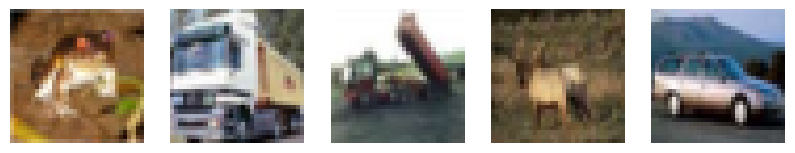

In [9]:
i = 1
pyplot.figure(figsize=(10, 10))
for image in x_train:
    if i > 5:
        break
    pyplot.subplot(1, 5, i)
    pyplot.imshow(image)
    pyplot.axis("off")
    i += 1
pyplot.show()

In [10]:
x_train_flattened = x_train.reshape((len(x_train), prod(x_train.shape[1:])))
x_test_flattened = x_test.reshape((len(x_test), prod(x_test.shape[1:])))

In [11]:
x_train_flattened.shape, x_test_flattened.shape

((50000, 3072), (10000, 3072))

In [12]:
encoding_dim = 100  # This is the size of our encoded representations

## Create Autoencoder Model

In [13]:
input_img = Input(shape=(3072,))

# Encoder
x = layers.Dense(1000, activation="relu")(input_img)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dense(200, activation="relu")(x)
encoded = layers.Dense(encoding_dim, activation="relu")(x)  # Define encoding dimension

# Decoder
x = layers.Dense(200, activation="relu")(encoded)
x = layers.Dense(500, activation="relu")(x)
x = layers.Dense(1000, activation="relu")(x)
decoded = layers.Dense(3072, activation="sigmoid")(x)  # Match output dimension to input

autoencoder = Model(input_img, decoded)

I0000 00:00:1749562990.848313      77 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [ ]:
autoencoder.compile(loss="mse", optimizer="adam")

In [14]:
h = autoencoder.fit(x_train_flattened, x_train_flattened, epochs=100, batch_size=64)

Epoch 23/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0124
Epoch 24/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0123
Epoch 25/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0122
Epoch 26/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0121
Epoch 27/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0120
Epoch 28/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0119
Epoch 29/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0118
Epoch 30/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0118
Epoch 31/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0116
Epoch 32/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0116
Epoch 33/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0115
Epoch 34/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0114
Epoch 35/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0115
Epoch 36/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0114
Epoch 37/100
782/782 ━━━━━━━━━━━━━

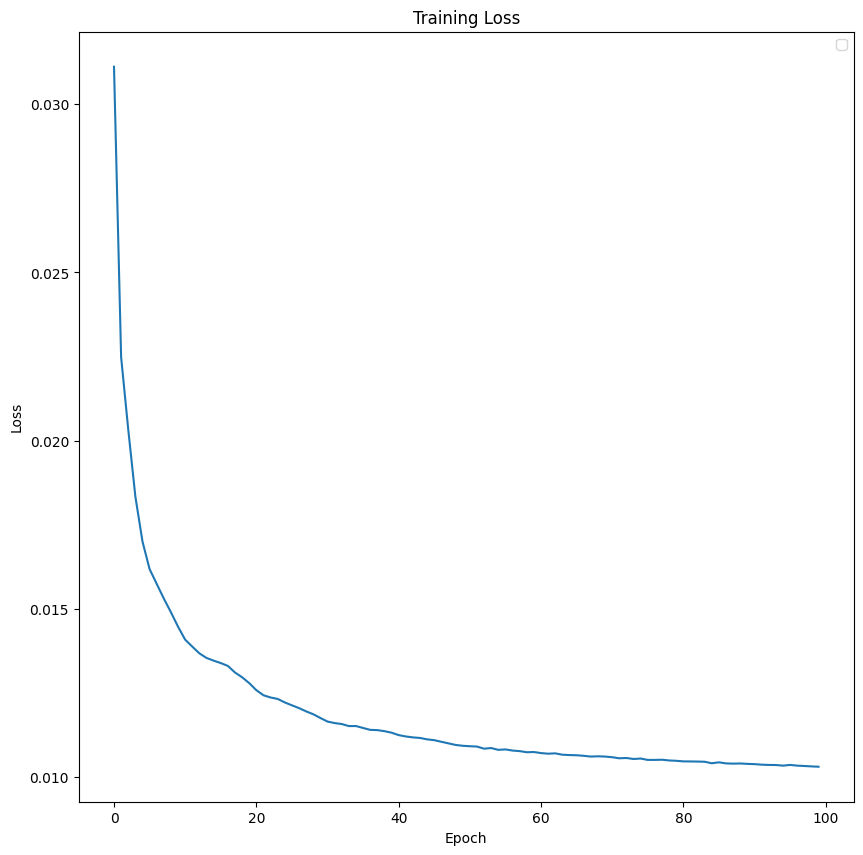

In [15]:
pyplot.figure(figsize=(10, 10))
pyplot.plot(arange(0, 100), h.history["loss"])
pyplot.title("Training Loss")
pyplot.xlabel("Epoch")
pyplot.ylabel("Loss")
pyplot.legend()
pyplot.show()

In [17]:
encoder = Model(input_img, encoded)

In [19]:
encoded_input = Input(shape=(encoding_dim,))
decoder_l1 = autoencoder.layers[-4]
decoder_l2 = autoencoder.layers[-3]
decoder_l3 = autoencoder.layers[-2]
decoder_l4 = autoencoder.layers[-1]
# as if I am multiplying the last layer with the code layer to get the last output
decoder = Model(
    encoded_input, decoder_l4(decoder_l3(decoder_l2(decoder_l1(encoded_input))))
)

In [20]:
encoded_images = encoder.predict(x_test_flattened)
decoded_images = decoder.predict(encoded_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


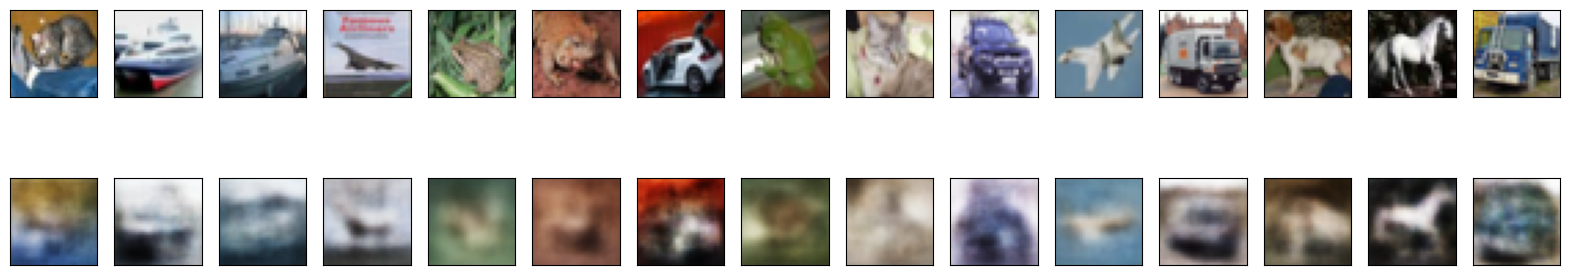

In [21]:
n = 15
pyplot.figure(figsize=(20, 4))
for i in range(n):
    ax = pyplot.subplot(2, n, i + 1)
    pyplot.imshow(x_test_flattened[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(2, n, i + 1 + n)
    pyplot.imshow(decoded_images[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

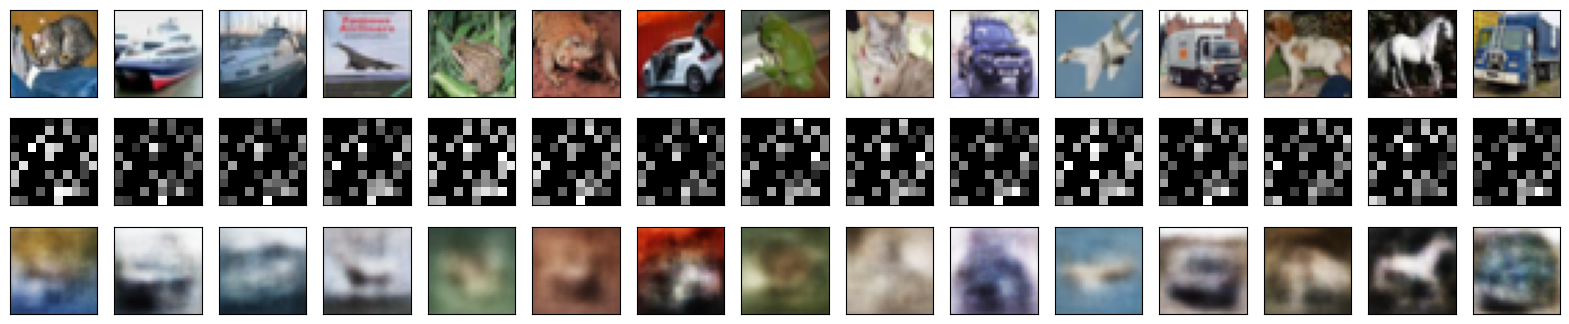

In [22]:
n = 15
pyplot.figure(figsize=(20, 4))
for i in range(n):
    ax = pyplot.subplot(3, n, i + 1)
    pyplot.imshow(x_test_flattened[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(3, n, i + 1 + n)
    pyplot.imshow(encoded_images[i].reshape(10, 10))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(3, n, i + 1 + 2 * n)
    pyplot.imshow(decoded_images[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

In [23]:
def add_gaussian_noise(images: ndarray, mean: float, std_dev: float) -> ndarray:
    noise = random.normal(mean, std_dev, size=images.shape)
    return clip(images + noise, 0.0, 1.0)

In [ ]:
mean = 0
sigma = 0.1

In [24]:
x_train_noisy = add_gaussian_noise(x_train, mean, sigma)
x_test_noisy = add_gaussian_noise(x_test, mean, sigma)

In [25]:
x_train_noisy.shape, x_test_noisy.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [26]:
x_train_noisy_flattened = x_train_noisy.reshape(
    (len(x_train_noisy), prod(x_train_noisy.shape[1:]))
)
x_test_noisy_flattened = x_test_noisy.reshape(
    (len(x_test_noisy), prod(x_test_noisy.shape[1:]))
)

In [27]:
backend.clear_session()

### After Adding Noise

In [28]:
autoencoder.compile(optimizer="adam", loss="mse")

In [29]:
h = autoencoder.fit(
    x_train_noisy_flattened, x_train_flattened, epochs=100, batch_size=64
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0117
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0110
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0110
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0110
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0109
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0110
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0109
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0109
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0109
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0109


In [30]:
encoded_images_noisy = encoder.predict(x_test_noisy_flattened)
decoded_images_noisy = decoder.predict(encoded_images_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


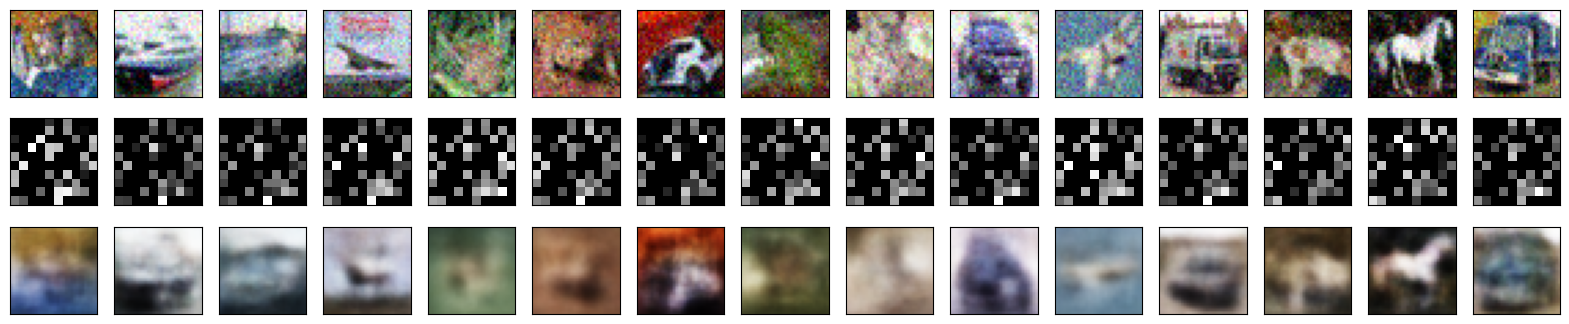

In [31]:
n = 15
pyplot.figure(figsize=(20, 4))
for i in range(n):
    ax = pyplot.subplot(3, n, i + 1)
    pyplot.imshow(x_test_noisy[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(3, n, i + 1 + n)
    pyplot.imshow(encoded_images_noisy[i].reshape(10, 10))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(3, n, i + 1 + 2 * n)
    pyplot.imshow(decoded_images_noisy[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

In [32]:
def add_noise_to_code(encoded: ndarray, mean: float, std_dev: float) -> ndarray:
    noise = backend.random_normal(
        shape=backend.shape(encoded), mean=mean, stddev=std_dev
    )
    return encoded + noise

In [33]:
encoded_images = encoder.predict(x_test_flattened)
encoded_images_noisy = add_noise_to_code(encoded_images_noisy, mean, sigma)
decoded_images_noisy = decoder.predict(encoded_images_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [34]:
encoded_images_noisy = array(encoded_images_noisy)

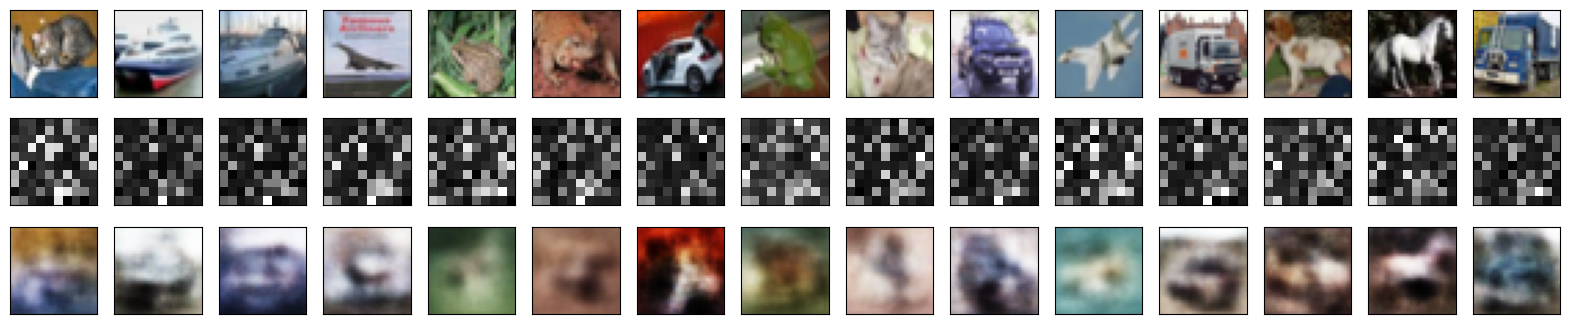

In [35]:
n = 15
pyplot.figure(figsize=(20, 4))
for i in range(n):
    ax = pyplot.subplot(3, n, i + 1)
    pyplot.imshow(x_test_flattened[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(3, n, i + 1 + n)
    pyplot.imshow(encoded_images_noisy[i].reshape(10, 10))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = pyplot.subplot(3, n, i + 1 + 2 * n)
    pyplot.imshow(decoded_images_noisy[i].reshape(32, 32, 3))
    pyplot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

## Create CNN Autoencoder Model

In [36]:
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(64, (3, 3), activation="relu", padding="same")(x)
encoded = MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = Conv2D(64, (3, 3), activation="relu", padding="same")(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

autoencoder = Model(input_img, decoded)

In [39]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [ ]:
h = autoencoder.fit(x_train, x_train, epochs=100, batch_size=64)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5537
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5532
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5532
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5532
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5531
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5521
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5524
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5522
Epoch 9/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5519
Epoch 10/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5522
Epoch 11/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5517
Epoch 12/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5519
Epoch 13/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5511
Epoch 14/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5522
Epoch 15/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 3

In [ ]:
pyplot.figure(figsize=(10, 10))
pyplot.plot(arange(0, 100), h.history["loss"])
pyplot.title("Training Loss")
pyplot.xlabel("Epoch")
pyplot.ylabel("Loss")
pyplot.legend()
pyplot.show()